# Wer hat sich einen Bonus verdient?

## Datensatz importieren

In [125]:
import pandas as pd

dataset = pd.read_csv('predict_bonus.csv', sep=';')

## Aufteilung in Features and Labels

In [126]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [127]:
print(X)

[['erfuellt' 'erfuellt' 'uebertroffen' 'uebertroffen' 'erfuellt'
  'erfuellt' 'erfuellt' 5.0 5.5 5.0 4.75 5.5 5.0 5.5 6.0 5.75]
 ['erfuellt' 'erfuellt' 'erfuellt' 'erfuellt' 'erfuellt' 'erfuellt'
  'uebertroffen' 4.5 5.5 5.5 5.0 5.5 5.5 6.0 5.5 6.0]
 ['erfuellt' 'nicht erfuellt' 'uebertroffen' 'erfuellt' 'knapp erfuellt'
  'erfuellt' 'knapp erfuellt' nan 4.5 3.5 4.5 5.0 4.5 4.5 4.5 5.5]
 ['erfuellt' 'erfuellt' 'nicht erfuellt' 'erfuellt' 'knapp erfuellt'
  'erfuellt' 'erfuellt' 5.0 5.0 5.0 4.5 4.0 4.5 5.0 5.5 5.0]
 ['erfuellt' 'uebertroffen' 'knapp erfuellt' 'erfuellt' 'knapp erfuellt'
  'uebertroffen' 'erfuellt' 5.0 4.0 4.5 5.0 4.5 5.0 4.5 6.0 4.5]
 ['erfuellt' 'uebertroffen' 'erfuellt' 'erfuellt' 'erfuellt'
  'uebertroffen' 'erfuellt' 5.0 5.0 5.0 5.0 6.0 5.5 5.0 5.5 5.25]
 ['erfuellt' 'nicht erfuellt' 'erfuellt' 'knapp erfuellt'
  'knapp erfuellt' 'erfuellt' 'erfuellt' 3.0 4.5 4.5 5.0 5.5 4.0 4.0 4.5
  5.25]
 ['erfuellt' 'nicht erfuellt' 'erfuellt' 'knapp erfuellt'
  'knapp erfuellt'

In [128]:
print(y)

[1.  1.  0.  1.  0.5 0.5 0.  0.5]


## Fehlende Daten

In [129]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 7:8])
X[:, 7:8] = np.round(imputer.transform(X[:, 7:8]), 2)

In [130]:
print(X)

[['erfuellt' 'erfuellt' 'uebertroffen' 'uebertroffen' 'erfuellt'
  'erfuellt' 'erfuellt' 5.0 5.5 5.0 4.75 5.5 5.0 5.5 6.0 5.75]
 ['erfuellt' 'erfuellt' 'erfuellt' 'erfuellt' 'erfuellt' 'erfuellt'
  'uebertroffen' 4.5 5.5 5.5 5.0 5.5 5.5 6.0 5.5 6.0]
 ['erfuellt' 'nicht erfuellt' 'uebertroffen' 'erfuellt' 'knapp erfuellt'
  'erfuellt' 'knapp erfuellt' 4.57 4.5 3.5 4.5 5.0 4.5 4.5 4.5 5.5]
 ['erfuellt' 'erfuellt' 'nicht erfuellt' 'erfuellt' 'knapp erfuellt'
  'erfuellt' 'erfuellt' 5.0 5.0 5.0 4.5 4.0 4.5 5.0 5.5 5.0]
 ['erfuellt' 'uebertroffen' 'knapp erfuellt' 'erfuellt' 'knapp erfuellt'
  'uebertroffen' 'erfuellt' 5.0 4.0 4.5 5.0 4.5 5.0 4.5 6.0 4.5]
 ['erfuellt' 'uebertroffen' 'erfuellt' 'erfuellt' 'erfuellt'
  'uebertroffen' 'erfuellt' 5.0 5.0 5.0 5.0 6.0 5.5 5.0 5.5 5.25]
 ['erfuellt' 'nicht erfuellt' 'erfuellt' 'knapp erfuellt'
  'knapp erfuellt' 'erfuellt' 'erfuellt' 3.0 4.5 4.5 5.0 5.5 4.0 4.0 4.5
  5.25]
 ['erfuellt' 'nicht erfuellt' 'erfuellt' 'knapp erfuellt'
  'knapp erfuellt

## Umgang mit kategorialen Daten (Bildungsziele)

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), list(range(7)))],
    remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [132]:
print('Matrix of features: \n' + str(X))

Matrix of features: 
[[0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 5.0 5.5 5.0 4.75 5.5 5.0
  5.5 6.0 5.75]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 4.5 5.5 5.5 5.0 5.5 5.5 6.0
  5.5 6.0]
 [1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 4.57 4.5 3.5 4.5 5.0 4.5
  4.5 4.5 5.5]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 5.0 5.0 5.0 4.5 4.0 4.5 5.0
  5.5 5.0]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 5.0 4.0 4.5 5.0 4.5 5.0 4.5
  6.0 4.5]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 5.0 5.0 5.0 6.0 5.5 5.0
  5.5 5.25]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 3.0 4.5 4.5 5.0 5.5 4.0 4.0
  4.5 5.25]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 4.5 3.5 5.0 4.5 4.5 4.5 4.0
  4.0 4.75]]


## Aufteilung in Trainings- und Testset

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [134]:
print(X_train)

[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 4.5 5.5 5.5 5.0 5.5 5.5 6.0
  5.5 6.0]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 3.0 4.5 4.5 5.0 5.5 4.0 4.0
  4.5 5.25]
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 5.0 5.5 5.0 4.75 5.5 5.0
  5.5 6.0 5.75]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 5.0 4.0 4.5 5.0 4.5 5.0 4.5
  6.0 4.5]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 5.0 5.0 5.0 4.5 4.0 4.5 5.0
  5.5 5.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 5.0 5.0 5.0 6.0 5.5 5.0
  5.5 5.25]]


In [135]:
print(X_test)

[[1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 4.5 3.5 5.0 4.5 4.5 4.5 4.0
  4.0 4.75]
 [1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 4.57 4.5 3.5 4.5 5.0 4.5
  4.5 4.5 5.5]]


In [136]:
print(y_train)

[1.  0.  1.  0.5 1.  0.5]


In [137]:
print(y_test)

[0.5 0. ]


## Feature Scaling

In [138]:
from sklearn.preprocessing import StandardScaler
startIndex = 10
sc = StandardScaler()
X_train[:, startIndex:] = sc.fit_transform(X_train[:, startIndex:])
X_test[:, startIndex:] = sc.transform(X_test[:, startIndex:])

In [139]:
import numpy as np

X_train = X_train.astype(np.float64)
X_test  = X_test .astype(np.float64)

np.set_printoptions(precision=2, suppress=True)

print(X_train)


[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    2.24 -0.11
   1.09  1.7   0.65  0.49  1.09  1.55  0.    1.45]
 [ 1.    0.    0.    0.    0.    1.    0.    1.    0.    0.   -0.45 -2.17
  -0.78 -1.21  0.65  0.49 -1.72 -1.55 -2.   -0.09]
 [ 0.    0.    0.    0.    1.    0.    1.    0.    0.    0.   -0.45  0.57
   1.09  0.24 -0.65  0.49  0.16  0.77  1.    0.94]
 [ 0.    1.    1.    0.    0.    0.    0.    1.    1.    0.   -0.45  0.57
  -1.72 -1.21  0.65 -0.97  0.16 -0.77  1.   -1.62]
 [ 0.    0.    0.    1.    0.    0.    0.    1.    0.    0.   -0.45  0.57
   0.16  0.24 -1.96 -1.7  -0.78  0.    0.   -0.6 ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    1.    0.   -0.45  0.57
   0.16  0.24  0.65  1.21  1.09  0.    0.   -0.09]]


In [140]:
print(X_test)

[[ 1.    0.    0.    0.    0.    1.    0.    1.    0.    0.   -0.45 -0.11
  -2.65  0.24 -1.96 -0.97 -0.78 -1.55 -3.   -1.11]
 [ 1.    0.    0.    0.    1.    0.    0.    1.    0.    1.   -0.45 -0.02
  -0.78 -4.12 -1.96 -0.24 -0.78 -0.77 -2.    0.43]]


### Normalisierung

In [141]:
# from sklearn.preprocessing import Normalizer
#
# nz = Normalizer()
# X_train[:, startIndex:] = nz.fit_transform(X_train[:, startIndex:])
# X_test[:, startIndex:] = nz.transform(X_test[:, startIndex:])

In [142]:
# print(X_train)

In [143]:
# print(X_test)

## Simple Linear Regression

### Training

In [144]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

### Testing

In [145]:
# y_pred = regressor.predict(X_test)

### Testing Results

In [146]:
# print(y_pred)

In [147]:
# print(y_test)

## Multiple Linear Regression

### Training

In [148]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Prediction

In [149]:
y_pred = regressor.predict(X_test)


### Print

In [150]:
import numpy as np
print(
    np.concatenate(
        (y_pred.reshape(len(y_pred), 1),
         y_test.reshape(len(y_test ), 1)),
        axis=1
    )
)

[[0.31 0.5 ]
 [0.38 0.  ]]


# Plotting

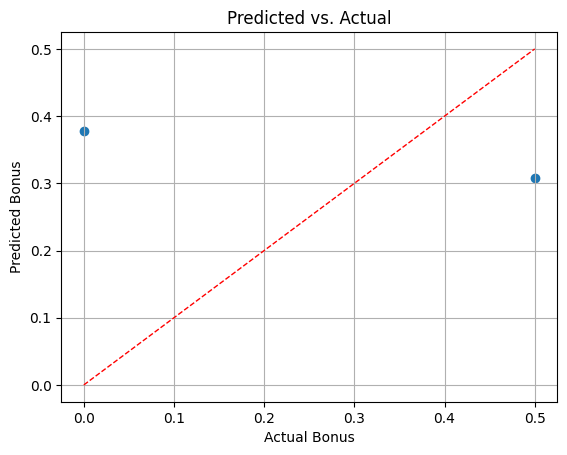

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Angenommen, du hast beides schon berechnet:
# y_test = np.array([...])
# y_pred = np.array([...])

plt.figure()
plt.scatter(y_test, y_pred, marker='o')
# Ideallinie y = x
min_val = np.min([y_test.min(), y_pred.min()])
max_val = np.max([y_test.max(), y_pred.max()])
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)

plt.xlabel('Actual Bonus')
plt.ylabel('Predicted Bonus')
plt.title('Predicted vs. Actual')
plt.grid(True)
plt.show()


#### Test for new Values

In [152]:
## Expected Vs. Actual

## vom test set

y_pred2 = regressor.predict([[
    1.0, 0.0, 0.0, 0.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 0.0,
    -0.45, -0.11, -2.65, 0.24,
    -1.96, -0.97, -0.78, -1.55,
    -3.0, -1.11
]])

y_test2 = np.array([0.5])

print(
    np.concatenate(
        (y_pred2.reshape(len(y_pred2), 1),
         y_test2.reshape(len(y_test2 ), 1)),
        axis=1
    )
)

## vom training set

y_pred2 = regressor.predict([[
    0.0, 0.0, 0.0, 0.0, 1.0,
    0.0, 1.0, 0.0, 0.0, 0.0,
   -0.45, 0.57, 1.09, 0.24, -0.65,
    0.49, 0.16, 0.77, 1.0, 0.94
]])

y_test2 = np.array([1])

print(
    np.concatenate(
        (y_pred2.reshape(len(y_pred2), 1),
         y_test2.reshape(len(y_test2 ), 1)),
        axis=1
    )
)


[[0.31 0.5 ]]
[[1. 1.]]


## Polynomial Regression

### Training

In [153]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)

regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [154]:
y_test_pred = regressor.predict(poly_reg.transform(X_test))

In [155]:
print("Prediction: ", y_test_pred)
print("Actual: ", y_test)

Prediction:  [0.22 0.42]
Actual:  [0.5 0. ]
